# Credit Card Customer Segmentation - Guided Project using the K-means algorithm

This is a guided project from Dataquest's course: "Introduction to Unsupervised Machine Learning."

The dataset in this project contains information on a company's clients, and the aim is to use the **K-means algorithm** to segment them into diffrent groups so that different business strategies can be applied to each type of customer.

This is the data dictionary:

* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio.

In [1]:
# Import relevant libraries for the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Read the data into a dataframe.
customers = pd.read_csv('customer_segmentation.csv')

# Display the first 5 rows of the dataframe.
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


### Exploratory Data Analysis

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

There are 10,127 rows and 14 columns in the dataset.

The first column contains the a unique identifier for each customer, which won't be needed in the segmentation process. This means that we are left with 13 columns.

In [4]:
# Count the column data types.
customers.dtypes.value_counts()

int64      9
object     3
float64    2
dtype: int64

Ignoring the customer_id column, we have 8 columns containing integers, 3 columns of the string type, and two columns with floats. There 3 string columns are of categorical type (`gender`, `education_level`, and `marital_status`).

In [5]:
# Check for missing values
customers.isna().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

There are no missing values in any of the columns.

Let's create a Pearson's correlation heat map to explore how the columns correlate to one another.

<AxesSubplot:>

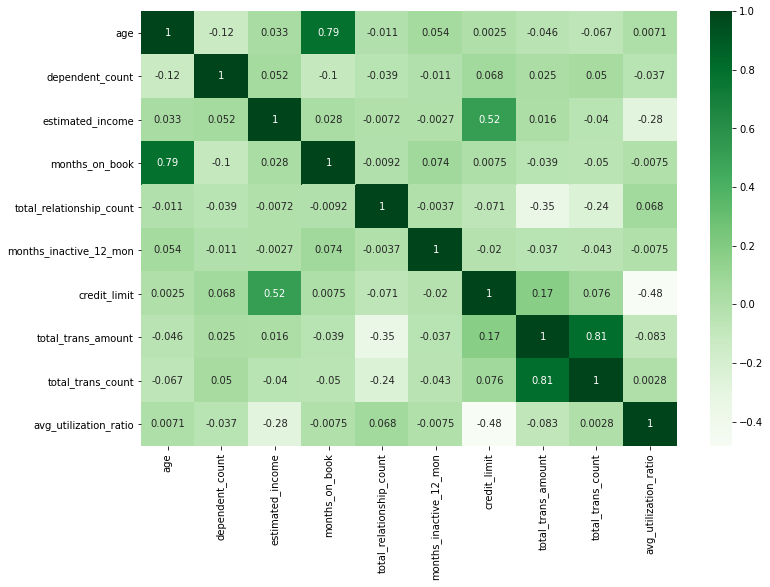

In [6]:
# Drop customer_id since we're not going to use it.
customers_clean = customers.drop('customer_id', axis=1)

correlations = customers_clean.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap='Greens')

The following columns are correlated with each other (above or below arbitrary cutoff points of +/- 0.3):
* `age` and `months_on_book` (positive);
* `credit_limit` and `estimated_income` (positive);
* `credit_limit` and `avg_utilization_ratio` (negative); 
* `total_trans_amount` and `total_trans_count`  (positive); and
* `total_relationship_count` and `total_trans_amount` (negative).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Plot the distribution of each numeric column
